In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
apartment_for_rent_classified = fetch_ucirepo(id=555) 
  
# data (as pandas dataframes) 
apartment_data = apartment_for_rent_classified.data.features 
apartment_target = apartment_for_rent_classified.data.targets 
  
# metadata 
print(apartment_for_rent_classified.metadata) 
  
# variable information 
print(apartment_for_rent_classified.variables) 


{'uci_id': 555, 'name': 'Apartment for Rent Classified', 'repository_url': 'https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified', 'data_url': 'https://archive.ics.uci.edu/static/public/555/data.csv', 'abstract': 'This is a dataset of classified for apartments for rent in USA.\n', 'area': 'Business', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5X623', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that \r\ncolumn price and square_feet never is empty but the dataset is saved as it was created.\r\n\r\n

/opt/anaconda3/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [4]:
apartment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

In [5]:
#apartment_data

In [6]:
apartment_data.dtypes

category          object
title             object
body              object
amenities         object
bathrooms         object
bedrooms          object
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet       object
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time             float64
dtype: object

In [7]:
#Change columns to numerical (the ones we want to use)?

In [8]:
apartment_data.isna().sum()

category             0
title                0
body                 0
amenities        16077
bathrooms           66
bedrooms           127
currency             4
fee                  3
has_photo            3
pets_allowed     60634
price                5
price_display        6
price_type           3
square_feet          3
address          91880
cityname           305
state              305
latitude            29
longitude           31
source               6
time                 6
dtype: int64

In [9]:
#Cleaning: drop any columns that will not be used, decide what to do with null values, try to make any visualizations

In [10]:
apartment_data.dropna(subset=['latitude', 'longitude'], inplace=True)

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_7753/65273342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_data.dropna(subset=['latitude', 'longitude'], inplace=True)


In [11]:
apartment_data.duplicated().sum()

84

In [12]:
apartment_data.drop_duplicates(inplace=True)

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_7753/45068775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_data.drop_duplicates(inplace=True)


In [13]:
print(apartment_data.duplicated().sum())
apartment_data.isna().sum()

0


category             0
title                0
body                 0
amenities        16052
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60566
price                1
price_display        1
price_type           0
square_feet          0
address          91769
cityname           277
state              277
latitude             0
longitude            0
source               0
time                 0
dtype: int64

In [14]:
apartment_data['currency'].value_counts()

currency
USD    99711
Name: count, dtype: int64

In [15]:
apartment_data.drop(columns=['title', 'body','amenities', 'currency', 'has_photo', 'pets_allowed', 'address', ], inplace=True)

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_7753/1782923510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment_data.drop(columns=['title', 'body','amenities', 'currency', 'has_photo', 'pets_allowed', 'address', ], inplace=True)


In [16]:
type(apartment_target)

NoneType

In [17]:
#What is our target? Predict the cost of rent given the location's amenities and transportation access (found via web scrapping and APIs)

In [18]:
apartment_data['price']

0        2195.0
1        1250.0
2        1395.0
3        1600.0
4         975.0
          ...  
99821     780.0
99822     813.0
99823    1325.0
99824     931.0
99825    1595.0
Name: price, Length: 99711, dtype: float64

In [19]:
apartment_data['price_display']

0        2195
1        1250
2        1395
3        1600
4         975
         ... 
99821     780
99822     813
99823    1325
99824     931
99825    1595
Name: price_display, Length: 99711, dtype: object

In [20]:
#Same information

In [21]:
apartment_data['price_type'].value_counts() 
#Should we drop all that are NOT monthly? Probably...

price_type
Monthly           99707
Weekly                3
Monthly|Weekly        1
Name: count, dtype: int64

In [22]:
apartment_data['price'].nunique()

3691

In [23]:
apartment_data['state'].nunique()

51

In [24]:
#apartment_data['state'].value_counts().sort_index()

In [25]:
#50 states + DC

In [26]:
apartment_data['cityname'].nunique()

#Keep because we need it for analysis

2981

In [27]:
#Should we convert states to regions?

In [28]:
apartment_data['category'].value_counts()

category
housing/rent/apartment            99650
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64

In [29]:
#Should we remove all that are not rent apartment? Probably...

In [30]:
apartment_data['fee'].value_counts()

fee
No     99510
Yes      201
Name: count, dtype: int64

In [31]:
apartment_data = apartment_data[apartment_data['category'] == 'housing/rent/apartment']
apartment_data.shape

(99650, 14)

In [32]:
apartment_data = apartment_data[apartment_data['price_type'] == 'Monthly']
apartment_data.shape

(99646, 14)

In [33]:
apartment_data.head()

,category,bathrooms,bedrooms,fee,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,1,1,No,2195.0,2195,Monthly,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,1.5,3,No,1250.0,1250,Monthly,1500,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,2,3,No,1395.0,1395,Monthly,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,1,2,No,1600.0,1600,Monthly,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,1,1,No,975.0,975,Monthly,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [34]:
apartment_data.drop(columns=['category', 'fee', 'price_display', 'source','time', 'price_type'], inplace=True)

In [35]:
#CLEANED DATA

apartment_data.reset_index(drop=True)

,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude
0,1,1,2195.0,542,Redondo Beach,CA,33.8520,-118.3759
1,1.5,3,1250.0,1500,Newport News,VA,37.0867,-76.4941
2,2,3,1395.0,1650,Raleigh,NC,35.8230,-78.6438
3,1,2,1600.0,820,Vacaville,CA,38.3622,-121.9712
4,1,1,975.0,624,Albuquerque,NM,35.1038,-106.6110
...,...,...,...,...,...,...,...,...
99641,1.0,1.0,780.0,605,Houston,TX,29.6151,-95.1998
99642,2.0,2.0,813.0,921,Jacksonville,FL,30.2254,-81.7579
99643,1.0,1.0,1325.0,650,San Diego,CA,32.7379,-117.0914
99644,1.0,1.0,931.0,701,Huntersville,NC,35.4158,-80.8451


In [36]:
apartment_data.dtypes
#Change bathrooms, bedrooms and square_feet to floats

bathrooms       object
bedrooms        object
price          float64
square_feet     object
cityname        object
state           object
latitude       float64
longitude      float64
dtype: object

In [37]:
apartment_data['square_feet'].value_counts()

square_feet
1000    1044
900      918
800      918
700      862
750      820
        ... 
364        1
2429       1
2211       1
3412       1
2932       1
Name: count, Length: 4181, dtype: int64

In [38]:
apartment_data['bathrooms'] = pd.to_numeric(apartment_data['bathrooms'])
apartment_data['bathrooms'].value_counts()

bathrooms
1.0    56394
2.0    36638
1.5     3176
2.5     2078
3.0      889
3.5      209
4.0      119
4.5       42
5.0       20
6.0        8
5.5        4
7.0        3
8.0        2
8.5        1
9.0        1
7.5        1
Name: count, dtype: int64

In [39]:
apartment_data['bedrooms'] = pd.to_numeric(apartment_data['bedrooms'])
apartment_data['bedrooms'].value_counts()

bedrooms
2.0    46046
1.0    40411
3.0    10566
4.0     1499
0.0      661
5.0      285
6.0       47
7.0        4
8.0        3
9.0        1
Name: count, dtype: int64

In [40]:
apartment_data['square_feet'] = apartment_data['square_feet'].astype(int)

In [41]:
apartment_data.dtypes

bathrooms      float64
bedrooms       float64
price          float64
square_feet      int64
cityname        object
state           object
latitude       float64
longitude      float64
dtype: object

In [42]:
apartment_data.shape

(99646, 8)

In [43]:
apartment_data['state'].value_counts().sort_values(ascending=False)

state
TX    11270
CA    10328
VA     8297
NC     6300
CO     6282
FL     5785
MD     5263
MA     5034
OH     4905
GA     4786
NJ     4496
NV     2816
WA     2618
AZ     2379
LA     1355
MO     1202
PA     1139
TN     1114
IL     1036
NE     1020
KY      996
OK      961
SC      907
KS      899
UT      809
ND      743
NH      735
MI      710
NY      655
AR      597
MN      580
CT      515
IN      509
WI      430
IA      372
AL      354
OR      277
VT      125
RI      119
MS      107
ID       96
DC       93
MT       88
SD       86
AK       58
ME       32
HI       31
NM       24
WY       16
WV       13
DE        7
Name: count, dtype: int64

In [44]:
!pip install us

In [45]:
# Define the state to region mapping
state_region_map = {
    "Northeast": ["CT", "ME", "MA", "NH", "RI", "VT", "NJ", "NY", "PA"],
    "Midwest": ["IL", "IN", "MI", "OH", "WI", "IA", "KS", "MN", "MO", "NE", "ND", "SD"],
    "South": ["DE", "FL", "GA", "MD", "NC", "SC", "VA", "DC", "WV", "AL", "KY", "MS", "TN", "AR", "LA", "OK", "TX"],
    "West": ["AZ", "CO", "ID", "MT", "NV", "NM", "UT", "WY", "AK", "CA", "HI", "OR", "WA"]
}

# Create a reverse lookup dictionary
state_to_region_map = {state: region for region, states in state_region_map.items() for state in states}

# Function to get region from state
def state_to_region(state):
    return state_to_region_map.get(state, 'Unknown')

# Create a new column 'region' by applying the state_to_region function to each row in the 'state' column
apartment_data['region'] = apartment_data['state'].apply(state_to_region)

In [46]:
apartment_data

,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude,region
0,1.0,1.0,2195.0,542,Redondo Beach,CA,33.8520,-118.3759,West
1,1.5,3.0,1250.0,1500,Newport News,VA,37.0867,-76.4941,South
2,2.0,3.0,1395.0,1650,Raleigh,NC,35.8230,-78.6438,South
3,1.0,2.0,1600.0,820,Vacaville,CA,38.3622,-121.9712,West
4,1.0,1.0,975.0,624,Albuquerque,NM,35.1038,-106.6110,West
...,...,...,...,...,...,...,...,...,...
99821,1.0,1.0,780.0,605,Houston,TX,29.6151,-95.1998,South
99822,2.0,2.0,813.0,921,Jacksonville,FL,30.2254,-81.7579,South
99823,1.0,1.0,1325.0,650,San Diego,CA,32.7379,-117.0914,West
99824,1.0,1.0,931.0,701,Huntersville,NC,35.4158,-80.8451,South


In [47]:
apartment_data['region'].value_counts()

region
South        48205
West         25822
Northeast    12850
Midwest      12492
Unknown        277
Name: count, dtype: int64

In [48]:
apartment_data[apartment_data['region']=='Unknown']

,bathrooms,bedrooms,price,square_feet,cityname,state,latitude,longitude,region
5340,1.0,2.0,1880.0,1000,NaN,NaN,39.8163,-98.5576,Unknown
5464,1.0,1.0,1140.0,700,NaN,NaN,39.8163,-98.5576,Unknown
5501,1.5,1.0,1300.0,903,NaN,NaN,39.8163,-98.5576,Unknown
5502,1.5,1.0,1045.0,700,NaN,NaN,39.8163,-98.5576,Unknown
5503,2.5,3.0,4999.0,2414,NaN,NaN,39.8163,-98.5576,Unknown
...,...,...,...,...,...,...,...,...,...
80270,1.0,2.0,1500.0,1030,NaN,NaN,38.7904,-122.6052,Unknown
80271,2.0,3.0,795.0,1420,NaN,NaN,37.8286,-92.2006,Unknown
80272,2.0,2.0,1025.0,1118,NaN,NaN,37.8286,-92.2006,Unknown
80274,1.0,2.0,1215.0,781,NaN,NaN,37.2770,-75.9597,Unknown


In [49]:
apartment_data = apartment_data[apartment_data['region'] != 'Unknown']

In [50]:
apartment_data['region'].value_counts()

region
South        48205
West         25822
Northeast    12850
Midwest      12492
Name: count, dtype: int64

In [51]:
apartment_data.isna().sum()

bathrooms       57
bedrooms       123
price            1
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
region           0
dtype: int64

In [52]:
apartment_data = apartment_data.dropna()

In [53]:
apartment_data.isna().sum()

bathrooms      0
bedrooms       0
price          0
square_feet    0
cityname       0
state          0
latitude       0
longitude      0
region         0
dtype: int64

In [54]:
apartment_data_numeric = apartment_data.select_dtypes(include='number')

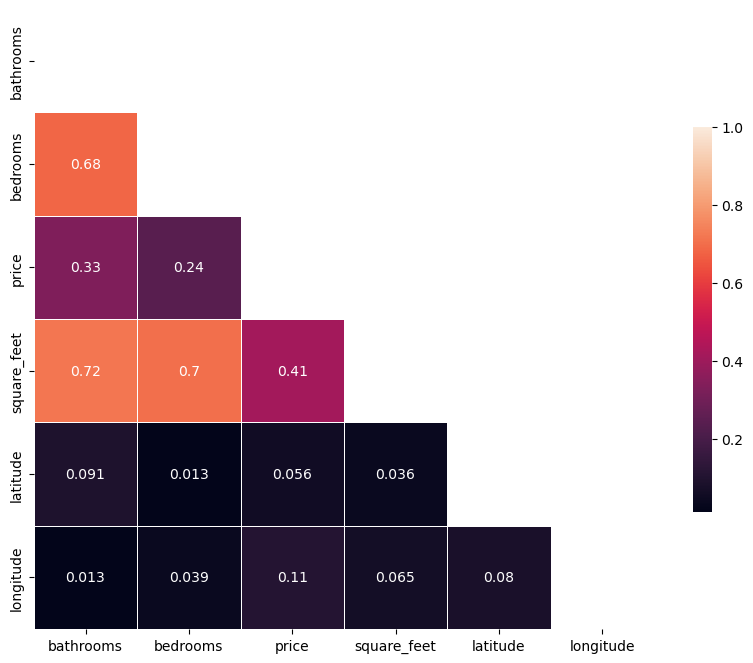

In [55]:
corr=np.abs(apartment_data_numeric.corr())

#Set up mask for triangle representation (so it only shows one side)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [56]:
features = apartment_data_numeric.drop(columns = ["price"])
target = apartment_data_numeric["price"]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [59]:
knn = KNeighborsRegressor(n_neighbors=10)

In [60]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [61]:
knn.score(X_test, y_test)

0.49562357642959765